In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Math, Latex
from scipy.optimize import curve_fit
from matplotlib import rc
rc('text', usetex=True)
from pylab import rcParams
rcParams['figure.figsize'] = 9,5
%matplotlib notebook

In [2]:
height = [0.4, 0.8, 1.4, 2.0, 2.6, 3.4, 3.8]
velSqr = [7.0, 17.0, 25.0, 38.0, 45.0, 62.0, 72.0]

In [3]:
def linearFit(x, m, b): 
    return m*x + b

def linFit(h, m):
    return m*h

In [4]:
fitParams, fitCovariances = curve_fit(linearFit, height, velSqr)
fitParam, fitCovariance = curve_fit(linFit, height, velSqr)
print(fitParam)
print(fitCovariance)

[ 18.44129555]
[[ 0.08427718]]


In [5]:
sigma = np.sqrt([fitCovariances[0,0], fitCovariances[1,1]])
zeroInterceptSigma = np.sqrt([fitCovariance[0,0]])
errorX = 0.05
errorY = 3.00
print(sigma)
print(zeroInterceptSigma)

[ 0.63367477  1.50565611]
[ 0.29030533]


In [7]:
y = np.zeros(len(height))
yHigh = np.zeros(len(height))
yLow = np.zeros(len(height))

i = 0
for i in range (0, len(height)):
    y[i] = linearFit(height[i], fitParams[0], fitParams[1])
    yHigh[i] = linearFit(height[i], fitParams[0] + 3*sigma[0], fitParams[1] - 3*sigma[1])
    yLow[i] = linearFit(height[i], fitParams[0] - 3*sigma[0], fitParams[1] + 3*sigma[1])

In [8]:
best = np.zeros(len(height))
steep = np.zeros(len(height))
grad = np.zeros(len(height))

j = 0
for j in range (0, len(height)):
    best[j] = linFit(height[j], fitParam[0])
    steep[j] = linFit(height[j], fitParam[0] + 3*zeroInterceptSigma[0])
    grad[j] = linFit(height[j], fitParam[0] - 3*zeroInterceptSigma[0])

<IPython.core.display.Javascript object>


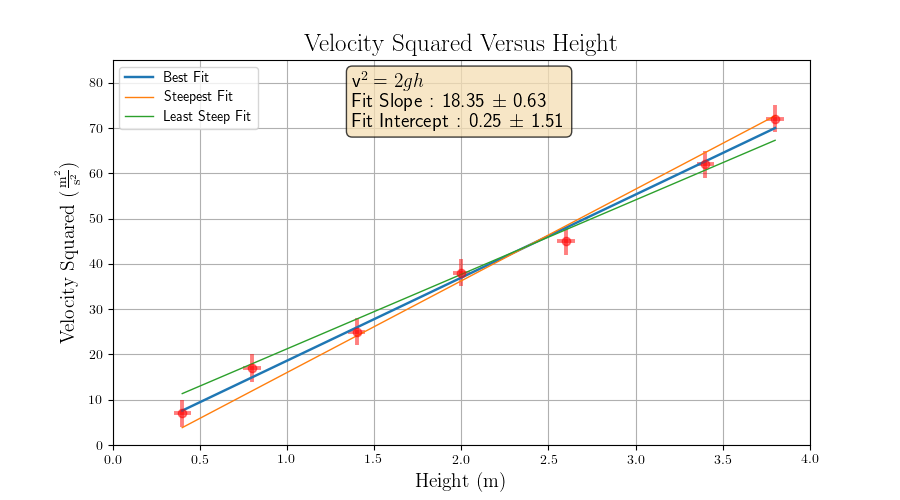

In [9]:
plt.figure(figsize=(9,5))
bestFit, = plt.plot(height, y, linewidth = 1.75)
steepFit, = plt.plot(height, yHigh, linewidth = 1.0)
gradualFit, = plt.plot(height, yLow, linewidth = 1.0)
plt.title(r'\textrm{Velocity Squared Versus Height}', fontsize = 18)
plt.ylabel(r'$\mathrm{Velocity \ Squared \ } (\frac{\mathrm{m}^2}{\mathrm{s}^2})$', fontsize = 14)
plt.xlabel(r'$\mathrm{Height \ (m)}$', fontsize = 14)
plt.errorbar(height, velSqr, fmt = 'ro', xerr = 0.05, yerr = 3.0, linewidth = 2.8, alpha = 0.5)
plt.grid(True)
plt.xlim(0,4)
plt.ylim(0,85)
plt.legend([bestFit, steepFit, gradualFit], ["Best Fit", "Steepest Fit", "Least Steep Fit"])
props = dict(boxstyle='round', facecolor='wheat', alpha=0.75)
plt.text(1.375, 70.0, 
    ("v^2 = 2gh \n Fit Slope : %.2f\t $\pm$ %.2f\n Fit Intercept : %.2f\t $\pm$ %.2f" 
    % (fitParams[0], sigma[0], fitParams[1], sigma[1])), fontsize=14,bbox=props )

plt.savefig('michelsonGraph.png', figsize=(6,4), dpi=400)
plt.show()

<IPython.core.display.Javascript object>


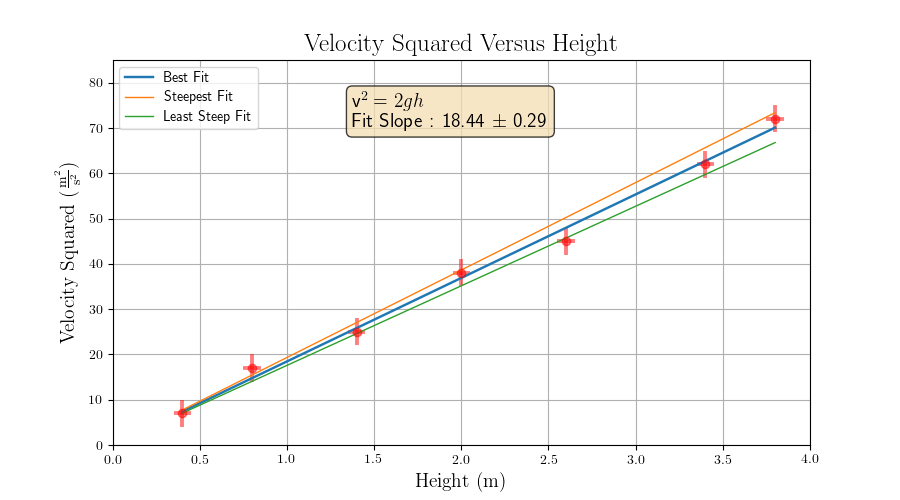

In [15]:
plt.figure(figsize=(9,5))
bestFit, = plt.plot(height, best, linewidth = 1.75)
steepFit, = plt.plot(height, steep, linewidth = 1.0)
gradualFit, = plt.plot(height, grad, linewidth = 1.0)
plt.title(r'\textrm{Velocity Squared Versus Height}', fontsize = 18)
plt.ylabel(r'$\mathrm{Velocity \ Squared \ } (\frac{\mathrm{m}^2}{\mathrm{s}^2})$', fontsize = 14)
plt.xlabel(r'$\mathrm{Height \ (m)}$', fontsize = 14)
plt.errorbar(height, velSqr, fmt = 'ro', xerr = 0.05, yerr = 3.0, linewidth = 2.8, alpha = 0.5)
plt.grid(True)
plt.xlim(0,4)
plt.ylim(0,85)
plt.legend([bestFit, steepFit, gradualFit], ["Best Fit", "Steepest Fit", "Least Steep Fit"])
props = dict(boxstyle='round', facecolor='wheat', alpha=0.75)
plt.text(1.375, 70.0, 
    ("v^2 = 2gh \n Fit Slope : %.2f\t $\pm$ %.2f" 
    % (fitParam[0], zeroInterceptSigma[0])), fontsize=14,bbox=props )

plt.savefig('graph2.png', figsize=(6,4), dpi=400)
plt.show()

<IPython.core.display.Javascript object>


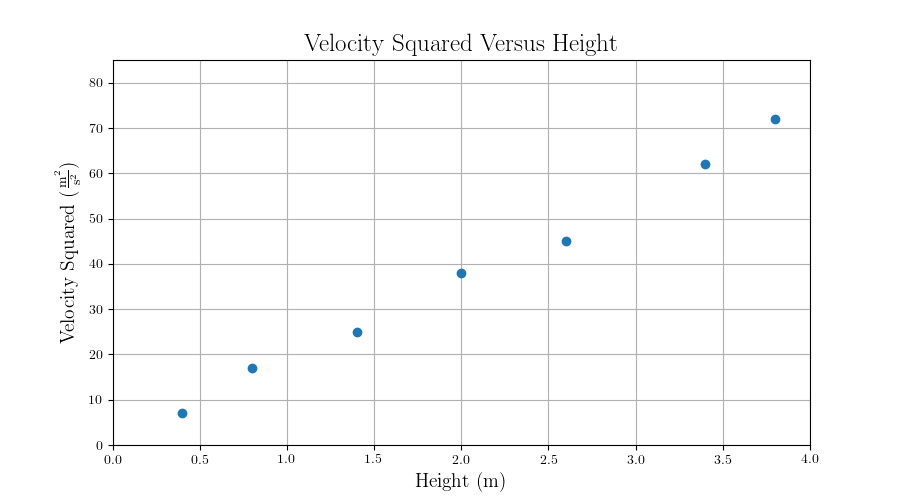

In [14]:
plt.figure(figsize=(9,5))
plt.plot(height, velSqr, 'o')
plt.title(r'\textrm{Velocity Squared Versus Height}', fontsize = 18)
plt.ylabel(r'$\mathrm{Velocity \ Squared \ } (\frac{\mathrm{m}^2}{\mathrm{s}^2})$', fontsize = 14)
plt.xlabel(r'$\mathrm{Height \ (m)}$', fontsize = 14)
#plt.errorbar(height, velSqr, fmt = 'ro', xerr = 0.05, yerr = 3.0, linewidth = 2.8, alpha = 0.5)
plt.grid(True)
plt.xlim(0,4)
plt.ylim(0,85)
plt.show()